In [1]:
%matplotlib inline

import sys
import os
sys.path.append("../../..")
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from osgeo import gdal
import osr
import my_packages.My_Geoprocess as mgp
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [ ]:
os.listdir('../../Resultats/Bathymetries/S2A_MSIL1C_20180305T230901/')

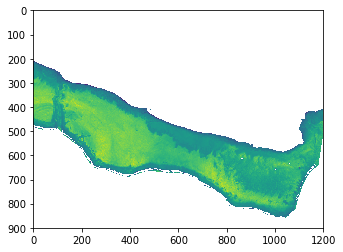

In [91]:
BathyResultsFolder = '../../Resultats/Bathymetries/S2A_MSIL1C_20180305T230901/Old/'
BathyMapFile = 'Stumpf_NoClass_Ridge_CoverPixRatio18.0%.tif'

BathyMap = gdal.Open(BathyResultsFolder + BathyMapFile, gdal.GA_ReadOnly)
BathyMap = BathyMap.GetRasterBand(1).ReadAsArray()
BathyMap = BathyMap[3000:3900,3400:4600]
plt.imshow(BathyMap)

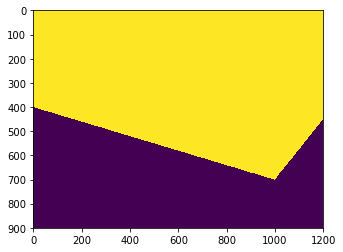

In [92]:
from skimage.draw import polygon
img = np.full(BathyMap.shape, False, dtype=bool)
r = np.array([0, 400, 700, 450,0,0])
c = np.array([0, 0, 1000, 1200,1200,0])
rr, cc = polygon(r, c)
img[rr, cc] = True
plt.imshow(img)
BathyMap[np.logical_and(np.isnan(BathyMap),img)] = -2.37

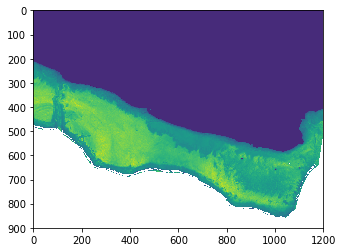

In [93]:
plt.imshow(BathyMap)

In [94]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk

selem = disk(6)
closed = closing(~np.isnan(BathyMap), selem)
BathyMap[np.logical_and(closed,np.isnan(BathyMap))] = -0.5
#plt.imshow(np.logical_and(closed,np.isnan(BathyMap)))

In [95]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk

selem = disk(6)
dilat = dilation(~np.isnan(BathyMap), selem)
BathyMap[np.logical_and(dilat,np.isnan(BathyMap))] = 1

selem = disk(3)
dilat = dilation(~np.isnan(BathyMap), selem)
BathyMap[np.logical_and(dilat,np.isnan(BathyMap))] = 5

selem = disk(3)
dilat = dilation(~np.isnan(BathyMap), selem)
BathyMap[np.logical_and(dilat,np.isnan(BathyMap))] = 10

selem = disk(3)
dilat = dilation(~np.isnan(BathyMap), selem)
BathyMap[np.logical_and(dilat,np.isnan(BathyMap))] = 20


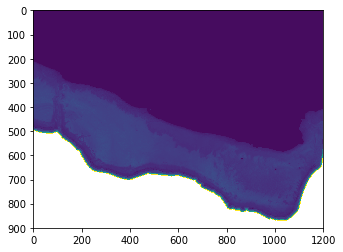

In [96]:
plt.imshow(BathyMap)

In [40]:
np.where(np.isnan(BathyMap))

(array([474, 475, 475, ..., 899, 899, 899], dtype=int64),
 array([   0,    0,    1, ..., 1197, 1198, 1199], dtype=int64))

In [35]:
BathyMap[np.logical_and(img, np.isnan(BathyMap))] = -1

In [ ]:
data=[go.Surface(z=(np.flip(BathyMap[9000:9400,4000:4550], axis=1)+1.37)*-1)]

layout=go.Layout(title='Bathymetries',
                 scene = dict(

                     aspectmode="data"
                     )
                )
fig=go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='elevations-3d-surface')

In [ ]:
import inspect
print(inspect.getsource(mgp.GetSparseCrop))

In [3]:
ImagesFolder = '../../../Poe/Images/Acolyte/S2A_MSIL1C_20180305T230901_N0206_R101_T58KEB_20180306T00234_bisAco/S2A_MSI_2018_03_05_23_09_01_T58KEB_L2R_tif/'

RGB_wavelength = ['665', '560','492' ]
Composite_Names = ['rhos_' + l + '.tif' for l in RGB_wavelength]

RGB = [mgp.GetSparseCrop(ImagesFolder+rbgBand,(10980, 10980), 0, 5500, 8500, 5480)  for rbgBand in Composite_Names]
VisRGB = np.dstack(RGB)
del RGB
VisRGB = VisRGB[5500:10980,0:8500]
VisRGB = VisRGB[3000:3900,3400:4600]


Im = mgp.RescalImg(VisRGB, (5,95))

In [ ]:
# create the figure
fig = plt.figure()

# show the reference image
ax1 = fig.add_subplot(121)
ax1.imshow(BathyMap)

ax2 = fig.add_subplot(122)
ax2.imshow(Im)

In [6]:
colors = np.empty(BathyMap.shape, dtype=tuple)
for u in range(Im.shape[0]):
    for v in range(Im.shape[1]):
        colors[u, v] = (Im[u, v,0],Im[u, v,1],Im[u, v,2])

In [ ]:
colors[8,8]

In [ ]:
# create the figure
fig = plt.figure()

# show the reference image
ax1 = fig.add_subplot(121)
ax1.imshow(BathyMap)

ax2 = fig.add_subplot(122)
ax2.imshow(Im)

In [5]:
colors = np.empty(X.shape, dtype=tuple)
for y in range(X.shape[1]):
    for x in range(X.shape[0]):
        colors[x, y] = (1*datac[x,y],1*datac[x,y],1*datac[x,y])

NameError: name 'X' is not defined

In [ ]:

RGB_wavelength = ['704', '665', '560' ]
Composite_Names = ['rhos_' + l + '.tif' for l in RGB_wavelength]

In [ ]:
xx,yy = np.mgrid[0:BathyMap.shape[0]:1, 0:BathyMap.shape[1]:1]

In [ ]:
BathyMap[np.logical_and(np.isnan(BathyMap))] = 0

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm

# create a 21 x 21 vertex mesh
xx,yy = np.mgrid[0:BathyMap.shape[0]:1, 0:BathyMap.shape[1]:1]



# create the figure
fig = plt.figure()

# show the reference image
ax1 = fig.add_subplot(121)
ax1.imshow(BathyMap)

# show the 3D rotated projection
ax2 = fig.add_subplot(122, projection='3d')
cset = ax2.plot_surface(xx, yy, BathyMap**2, facecolors=colors, linewidth=0)
ax2.set_axis_off()
scaling = np.array([getattr(ax2, 'get_{}lim'.format(dim))() for dim in 'xyz']); ax2.auto_scale_xyz(*[[np.min(scaling), np.max(scaling)]]*3)

plt.show()

In [101]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm
# create the figure
xx,yy = np.mgrid[0:BathyMap.shape[0]:1, 0:BathyMap.shape[1]:1]
fig = plt.figure(dpi=800)


# show the 3D rotated projection
ax2 = fig.add_subplot(111, projection='3d')
cset = ax2.plot_surface(xx, yy, -1*BathyMap*3, facecolors=colors,rcount=9000, ccount=9000)
ax2.set_axis_off()
ax2.view_init(elev=10, azim=-20)
ax2.dist = 5
scaling = np.array([getattr(ax2, 'get_{}lim'.format(dim))() for dim in 'xyz']); ax2.auto_scale_xyz(*[[np.min(scaling), np.max(scaling)]]*3)
fig.savefig('test0.png')
plt.close(fig)

In [ ]:
datac = (data - np.min(data))/(data.max()-data.min())
colors = np.empty(X.shape, dtype=tuple)
for y in range(X.shape[1]):
    for x in range(X.shape[0]):
        colors[x, y] = (1*datac[x,y],1*datac[x,y],1*datac[x,y])

In [ ]:
colors.max()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
xlen = len(X)
Y = np.arange(-5, 5, 0.25)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Create an empty array of strings with the same shape as the meshgrid, and
# populate it with two colors in a checkerboard pattern.
colortuple = ('y', 'b')
colors = np.empty(X.shape, dtype=str)
for y in range(ylen):
    for x in range(xlen):
        colors[x, y] = colortuple[(x + y) % len(colortuple)]

# Plot the surface with face colors taken from the array we made.
surf = ax.plot_surface(X, Y, Z, facecolors=colors, linewidth=0)

# Customize the z axis.
ax.set_zlim(-1, 1)
ax.w_zaxis.set_major_locator(LinearLocator(6))

plt.show()
